# Sprint-3：線形回帰のスクラッチ
___

## import部

In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

## クラス：ScratchLinearRegression

In [225]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=5000, lr=0.01, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        self.theta = np.array(0)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # Set theta with random value
        onesX = np.array([np.concatenate(([1], v)) for v in X])
        self.theta = np.random.rand(len(onesX[0]))
        
        count = 0
#         self.loss[count] = (0.5*MSE(self._linear_hypothesis(onesX), y))
        while count < self.iter:
            self._gradient_descent(onesX, y)
            self.loss[count] = (0.5*MSE(self._linear_hypothesis(onesX), y))

            count += 1
        
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の損失：{}".format(count, self.loss[count-1]))
            
        return self.loss

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        onesX = np.array([np.concatenate(([1], v)) for v in X])
        
        return self._linear_hypothesis(onesX)
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """

#         onesX = np.array([np.concatenate(([1], v)) for v in X])
        h_theta_x = np.dot(X, self.theta)
#         h_theta_x = np.dot(onesX, self.theta)
#         print(h_theta_x)

        return h_theta_x
    
    def _gradient_descent(self, X, error):
        """
        説明を記述
        """

        # Update theta
        self.theta = self.theta - (np.dot(self._linear_hypothesis(X) - error, X))/len(X)*self.lr
        
    def plot_loss(self):
        """
        説明を記述
        """
        x = np.arange(len(self.loss))
#         reshape_loss = self.loss.reshape(1, len(self.loss))

        plt.plot(x, self.loss)
        plt.show()
    
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """

#     print("y_pred:{}".format(y_pred))
    mse1 = np.sum((y - y_pred)**2)
#     print("mse1:{}".format(mse1))
    mse2 = mse1/len(y_pred)
#     print("MSE:{}".format(mse2))
    
    return mse2

In [199]:
tmp1 = np.arange(5000)
tmp2 = np.arange(5000)
print(tmp1.T.shape)
print(tmp2.shape)
print(np.concatenate([tmp1.reshape(1,5000), tmp2.reshape(1, 5000)], axis=1))

(5000,)
(5000,)
[[   0    1    2 ... 4997 4998 4999]]


## read csv

In [100]:
train_dataset = pd.read_csv("../Sprint-3/train.csv")
test_dataset = pd.read_csv("../Sprint-3/test.csv")

## データの前処理

In [106]:
for col in train_dataset.columns:
    values, uniques = pd.factorize(train_dataset[col])
    train_dataset[col] = values

## 学習用にデータを整形

In [107]:
train_X = train_dataset.drop(["Id", "SalePrice"], axis=1)
train_Y = train_dataset["SalePrice"]

## データの標準化

In [108]:
sc = StandardScaler()
sc_train_X = sc.fit_transform(train_X)

## 学習用とテスト用のデータに分割

In [109]:
x_train, x_test, y_train, y_test = train_test_split(np.array(train_X), \
                                                    np.array(train_Y), \
                                                    train_size=0.70, test_size=0.30)

## スクラッチ線形回帰の学習を実行

In [226]:
slr = ScratchLinearRegression(num_iter=5000, lr=0.0000008)
check_temp = slr.fit(x_train, y_train)

In [182]:
pred = slr.predict(x_test)

In [183]:
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)

In [184]:
auc(fpr, tpr)

0.0

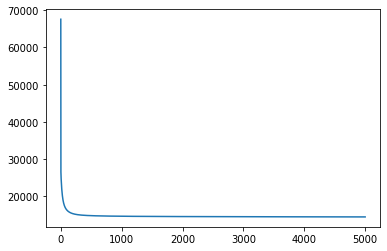

In [227]:
slr.plot_loss()

In [142]:
lr_model = LinearRegression()
lr_model = lr_model.fit(x_train, y_train)
pred1 = lr_model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, pred1, pos_label=1)

In [143]:
auc(fpr, tpr)

0.6564202689512589